In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

In [ ]:
img_size = 200
cell_size = img_size // 8

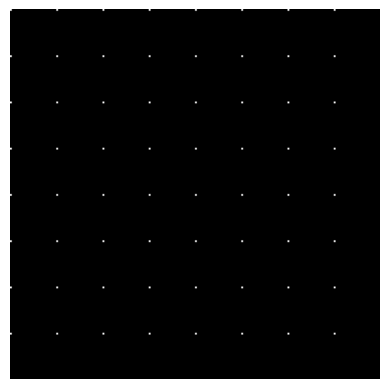

In [16]:
img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size):
    for j in range(0, img_size, cell_size):
        img[i, j, 0] = 255

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

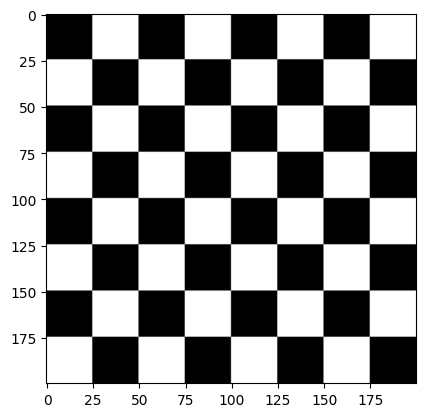

In [ ]:
img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size):
    for j in range(0, img_size, cell_size):
        img[i:(i+cell_size), j:(j+cell_size), 0] = ((i + j) // cell_size % 2) * 255

plt.imshow(img, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

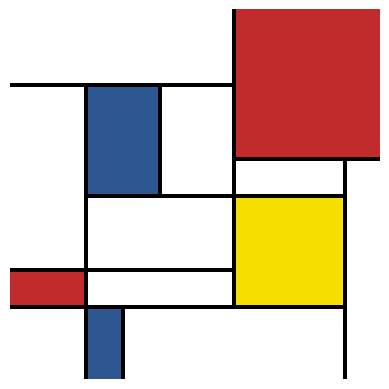

In [ ]:
img_size = 100

black = (0, 0, 0)
blue = (46, 87, 146)
red = (194, 43, 44)
yellow = (245, 222, 0)

img = np.full((img_size, img_size, 3), 255, dtype=np.uint8)

cv2.rectangle(img, (20, 20), (40, 50), blue, -1)
cv2.rectangle(img, (60, 0), (100, 40), red, -1)
cv2.rectangle(img, (60, 50), (90, 80), yellow, -1)
cv2.rectangle(img, (20, 80), (30, 100), blue, -1)
cv2.rectangle(img, (0, 70), (20, 80), red, -1)

cv2.line(img, (0, 20), (60, 20), black, 1)
cv2.line(img, (20, 50), (90, 50), black, 1)
cv2.line(img, (0, 80), (90, 80), black, 1)
cv2.line(img, (0, 70), (60, 70), black, 1)
cv2.line(img, (60, 40), (100, 40), black, 1)

cv2.line(img, (20, 20), (20, 100), black, 1)
cv2.line(img, (90, 40), (90, 100), black, 1)
cv2.line(img, (60, 0), (60, 80), black, 1)
cv2.line(img, (40, 20), (40, 50), black, 1)
cv2.line(img, (30, 80), (30, 100), black, 1)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [54]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = g - (frame[:,:,2] // 32) * 32

        modified_frame = np.dstack((b, g, r))
        cv2.imshow('Vid', modified_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [42]:
from cv2 import Mat


# b g r
red = (80, 0, 255)
dark_red = (40, 0, 135)
green = (85, 232, 0)
dark_green = (57, 108, 0)


def find_min(img: Mat) -> tuple[int, int, int]:
    h, w = img.shape[:2]
    result = (0, 0, 255)
    for j in range(h):
        for i in range(w):
            current_min_value = result[2]
            img_value = img[j, i]
            if img_value < current_min_value:
                result = (i, j, img_value)
    return result

def find_max(img: Mat) -> tuple[int, int, int]:
    h, w = img.shape[:2]
    result = (0, 0, 0)
    for j in range(h):
        for i in range(w):
            current_max_value = result[2]
            img_value = img[j, i]
            if img_value > current_max_value:
                result = (i, j, img_value)
    return result

def reduce_img_mean_8x8(img: Mat) -> Mat:
    h, w = img.shape[:2]
    reduced_h, reduced_w = h // 8, w // 8
    result = np.zeros((reduced_h, reduced_w, 1), dtype=np.uint8)
    for j in range(reduced_h):
        for i in range(reduced_w):
            remapped_j, remapped_i = j * 8, i * 8
            result[j, i] = img[remapped_j:(remapped_j + 8), remapped_i:(remapped_i + 8)].mean()
    return result

min: (100, 120, np.uint8(0))
max: (180, 120, np.uint8(255))


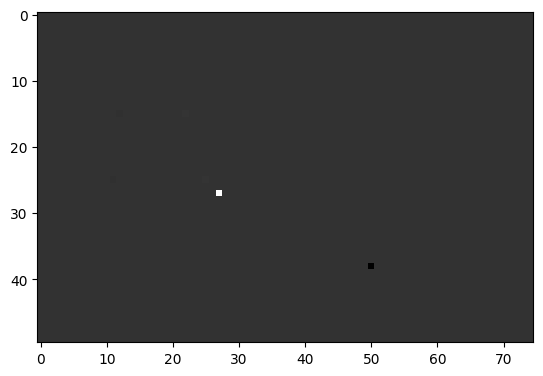

min: (50, 38, array([0], dtype=uint8))
max: (27, 27, array([255], dtype=uint8))
min: (400, 304)
max: (216, 216)


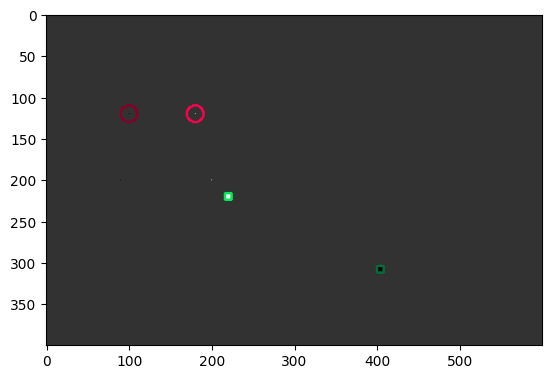

In [58]:
frame = np.full((400, 600, 3), 50, dtype=np.uint8)
frame[120, 100] = (0, 0, 0)
frame[200, 90] = (0, 0, 0)
frame[120, 180] = (255, 255, 255)
frame[200, 200] = (255, 255, 255)
frame[216:224, 216:224] = (255, 255, 255)
frame[304:312, 400:408] = (0, 0, 0)

# creamos la imagen en grises para calcular los puntos más claros y oscuros
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# pintar los circulos en los pixeles más claros y oscuros
min = find_min(gray)
max = find_max(gray)
print(f"min: {min}")
print(f"max: {max}")
cv2.circle(frame, min[:2], 10, dark_red[::-1], 2)
cv2.circle(frame, max[:2], 10, red[::-1], 2)

gray_avg_8x8 = reduce_img_mean_8x8(gray)
plt.imshow(gray_avg_8x8, cmap='gray')
plt.show()
min = find_min(gray_avg_8x8)
max = find_max(gray_avg_8x8)
print(f"min: {min}")
print(f"max: {max}")
min = (min[0] * 8, min[1] * 8)
max = (max[0] * 8, max[1] * 8)
print(f"min: {min}")
print(f"max: {max}")
cv2.rectangle(frame, min[:2], (min[0]+8, min[1]+8), dark_green[::-1], 2)
cv2.rectangle(frame, max[:2], (max[0]+8, max[1]+8), green[::-1], 2)

plt.imshow(frame)
plt.show()

In [53]:
vid = cv2.VideoCapture(0)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # creamos la imagen en grises para calcular los puntos más claros y oscuros
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # pintar los circulos en los pixeles más claros y oscuros
        min, max = find_min(gray), find_max(gray)
        cv2.circle(frame, min[:2], 3, dark_red, 2)
        cv2.circle(frame, max[:2], 3, red, 2)

        # pintar los rectángulos en los 8x8 más claros y oscuros
        gray_avg_8x8 = reduce_img_mean_8x8(gray)
        min, max = find_min(gray_avg_8x8), find_max(gray_avg_8x8)
        min, max = (min[0] * 8, min[1] * 8), (max[0] * 8, max[1] * 8)
        cv2.rectangle(frame, min, (min[0]+8, min[1]+8), dark_green, 2)
        cv2.rectangle(frame, max, (max[0]+8, max[1]+8), green, 2)

        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art


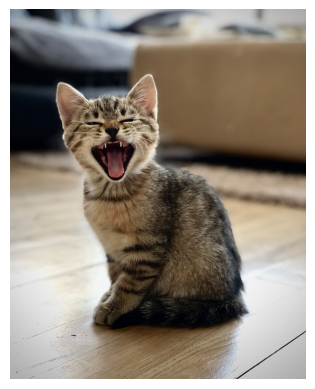

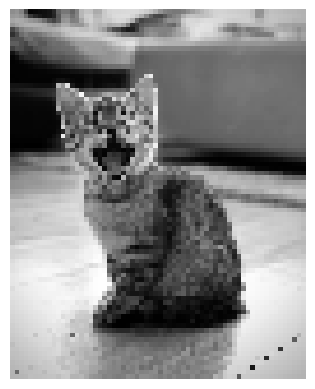

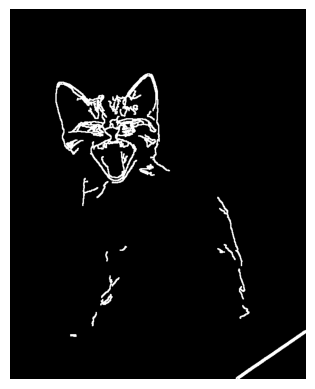

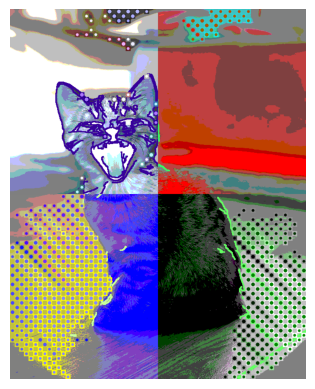

In [14]:
ncells: int = 10
tint: int = -120
circles_threshold: int = 190
q: int = 64

img = cv2.imread('./imagen-gato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
h, w, c = img.shape
cell_offset = ncells // 2

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
reduced_gray = cv2.resize(gray, (w // ncells, h // ncells), cv2.INTER_LINEAR)
reduced_h, reduced_w = reduced_gray.shape
plt.imshow(reduced_gray, cmap='gray')
plt.axis('off')
plt.show()

# destacar bordes
borders = cv2.GaussianBlur(gray, (5, 5), 0)
borders = cv2.Canny(borders, 70, 255)
borders = cv2.dilate(borders, np.ones((3, 3), np.uint8), iterations=1)
plt.imshow(borders, cmap='gray')
plt.axis('off')
plt.show()

for j in range(h):
    for i in range(w):
        # posterizar / añadir color banding
        v = img[j, i]
        banding_v = (v[0] // q * q, v[1] // q * q, v[2] // q * q)

        # añadir bordes
        border_v = borders[j, i]
        if border_v > 20:
            img[j, i] = (200, 255, 100)
        else:
            img[j, i] = banding_v

for j in range(reduced_h):
    flip = j % 2 == 0
    for i in range(reduced_w):
        flip = not flip
        # pintar las partes claras con círculos
        gray_v = reduced_gray[j, i]
        if flip and gray_v > circles_threshold:
            remapped_j, remapped_i = j * ncells, i * ncells
            v = img[remapped_j, remapped_i]
            color = (int(v[0]) + 10, int(v[1]) + 10, int(v[2]) + 10)
            color_2 = (int(v[0]) + tint, int(v[1]) + tint, 0)
            cv2.rectangle(img, (remapped_i, remapped_j), (remapped_i + ncells, remapped_j + ncells), color, -1)
            if flip:
                radius = int((float(gray_v) / 255) * cell_offset)
                cv2.circle(img, (remapped_i+ cell_offset, remapped_j + cell_offset), radius, color_2, -1)
        
# cambiar canales de colores en cada cuadrante
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# cuadrante arriba izquierda
img[:h//2, :w//2] = 255 - img[:h//2, :w//2]

# cuadrante arriba derecha
img[:h//2, w//2:, 0] = 255 - r[:h//2, w//2:]

# cuadrante abajo derecha
img[h//2:, w//2:, 0] = b[h//2:, w//2:]
img[h//2:, w//2:, 1] = g[h//2:, w//2:]
img[h//2:, w//2:, 2] = r[h//2:, w//2:]

# cuadrante abajo izquierda
img[h//2:, :w//2, 2] = 255 - b[h//2:, :w//2]

plt.imshow(img)
plt.axis('off')
plt.show()